## Descrição do projeto 

In [114]:
# Importação das bibliotecas

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Obtenção dos dados

In [115]:
# Import do arquivo Use_of_force.csv para um DataFrame

df = pd.read_csv('./datasets/Use_Of_Force.csv')

**Dicionário de variáveis**

Abaixo temo a descrição dos atributos contidos dentro desse conjunto de dados: 

- `ID` - Número de identificação do uso de força
- `Incident_Num` - Número identificador do incidente de força
- `Incident_Type` - Classificação do uso de força
- `Ocurred_date_time` - Data e hora do ocorrido 
- `Precinct` - Distrito onde ocorreu o uso de força
- `Sector` -  Setor onde ocorreu o uso de força
- `Beat` - 'Batida' onde ocorreu uso da força
- `Officer_ID` - Número identificor do oficial 
- `Subject_ID` - Número identificador do sujeito
- `Subject_Race` - Raça do sujeito do uso de força
- `Subject_Gender` - Gênero do sujeito do uso da força

In [116]:
df.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,2023UOF-0112-2422-30042,70534,Level 1 - Use of Force,01/14/2023 09:15:00 PM,OOJ,OOJ,99,2419,30914,White,Female
1,2018UOF-0300-2313-14902,21833,Level 1 - Use of Force,03/08/2018 03:27:00 PM,North,UNION,U1,2309,15792,White,Female
2,2015UOF-1167-1239-5068,6075,Level 1 - Use of Force,07/15/2015 04:26:00 AM,North,BOY,B1,1646,5032,Black or African American,Male
3,2023UOF-0718-2442-425,73829,Level 1 - Use of Force,08/11/2023 08:15:00 PM,East,GEORGE,G1,2438,424,White,Female
4,2016UOF-0263-1901-7582,9918,Level 1 - Use of Force,02/22/2016 08:31:00 PM,East,EDWARD,E2,1848,7531,Black or African American,Male


In [117]:
#Informações gerais do dataset

print('Informações gerais: ')
print('-------'*10)
print(df.info())
print('-------'*10)
print("Tamanho do conjunto de dados")
#print(f'{df.shape}')

Informações gerais: 
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17262 entries, 0 to 17261
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17262 non-null  object
 1   Incident_Num       17262 non-null  int64 
 2   Incident_Type      17262 non-null  object
 3   Occured_date_time  17262 non-null  object
 4   Precinct           17262 non-null  object
 5   Sector             15820 non-null  object
 6   Beat               17262 non-null  object
 7   Officer_ID         17262 non-null  int64 
 8   Subject_ID         17262 non-null  int64 
 9   Subject_Race       17262 non-null  object
 10  Subject_Gender     17262 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB
None
----------------------------------------------------------------------
Tamanho do conjunto de dados


In [118]:
#Conversão das datas para o formato datetime

df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'])

C:\Users\joaop\AppData\Local\Temp\ipykernel_21440\536686796.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'])


### Dados Faltantes

Durante a nossa análise exploratória, constatamos que, das 11 colunas presentes em nosso conjunto de dados, a coluna `Sector` contém aproximadamente 1442 amostras ausentes.

In [119]:
df.isnull().sum()

ID                      0
Incident_Num            0
Incident_Type           0
Occured_date_time       0
Precinct                0
Sector               1442
Beat                    0
Officer_ID              0
Subject_ID              0
Subject_Race            0
Subject_Gender          0
dtype: int64

## Visualização de dados 

Neste gáfico buscamos entender de que forma se distribuia os incidentes do uso da força ao longo dos anos, meses.

c:\Users\joaop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


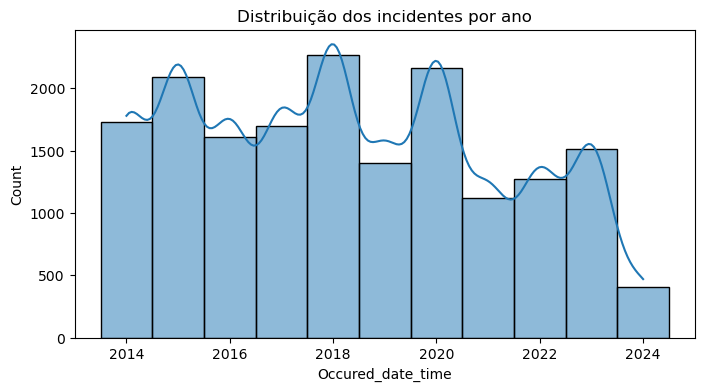

In [120]:

plt.figure(figsize=(8,4))
plt.title('Distribuição dos incidentes por ano')
sns.histplot(df, x=df['Occured_date_time'].dt.year, discrete=True, kde=True);
plt.xlim(2013,2024+1)
plt.show()

c:\Users\joaop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


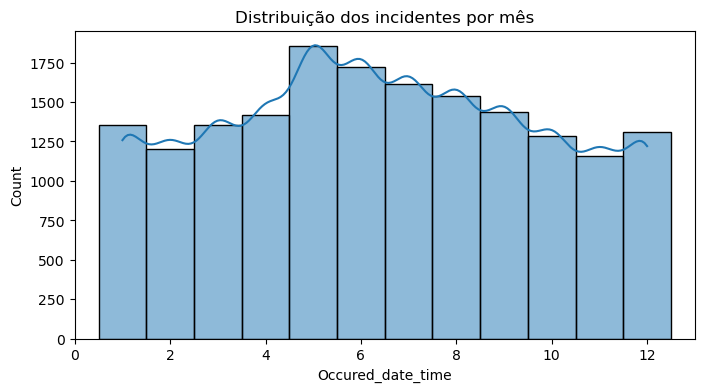

In [121]:
plt.figure(figsize=(8,4))
plt.title('Distribuição dos incidentes por mês')
sns.histplot(df, x=df['Occured_date_time'].dt.month, kde=True, discrete=True);
plt.xlim(0,12+1)
plt.show()

Buscamos compreender em que regiões da comtém uma maior incidência.

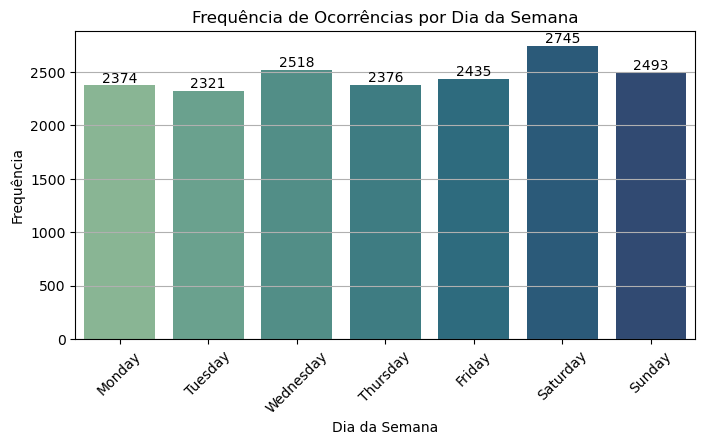

In [122]:
df['day_of_week'] = df['Occured_date_time'].dt.day_name()

day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0).reset_index()
day_counts.columns = ['day_of_week', 'count']

plt.figure(figsize=(8, 4))
ax =sns.barplot(data=day_counts, x='day_of_week', y='count', palette="crest",estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Frequência de Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()